In [14]:

import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# --- 1. NumPy Operations ---
arr = np.array([1.0, 2.0, 3.0, 4.0])

# Elementwise operation
print("Original array:", arr)
print("Array + 10:", arr + 10)
print("Array * 2:", arr * 2)


Original array: [1. 2. 3. 4.]
Array + 10: [11. 12. 13. 14.]
Array * 2: [2. 4. 6. 8.]


In [15]:

# Loop vs vectorized execution timing
import time

start = time.time()
loop_result = [x * 2 for x in arr]
loop_time = time.time() - start

start = time.time()
vector_result = arr * 2
vector_time = time.time() - start

print(f"Loop time: {loop_time:.8f} seconds")
print(f"Vectorized time: {vector_time:.8f} seconds")



Loop time: 0.00006700 seconds
Vectorized time: 0.00004792 seconds


In [16]:

# Path relative to notebooks/
df = pd.read_csv("/Users/aditya/Documents/USDZAR-2025-07.csv")

print(df.info())

print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720781 entries, 0 to 6720780
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   exchange   object 
 1   date_time  object 
 2   bid        float64
 3   ask        float64
dtypes: float64(2), object(2)
memory usage: 205.1+ MB
None
  exchange              date_time      bid      ask
0  USD/ZAR  20250701 00:00:00.141  17.7123  17.7338
1  USD/ZAR  20250701 00:00:00.156  17.7167  17.7267
2  USD/ZAR  20250701 00:00:00.234  17.7185  17.7267
3  USD/ZAR  20250701 00:00:00.234  17.7185  17.7272
4  USD/ZAR  20250701 00:00:00.313  17.7139  17.7336


In [17]:

summary_stats = df.describe()

print(summary_stats)


                bid           ask
count  6.720781e+06  6.720781e+06
mean   1.775517e+01  1.776158e+01
std    1.463539e-01  1.462219e-01
min    1.744190e+01  1.748770e+01
25%    1.761330e+01  1.761960e+01
50%    1.776970e+01  1.777550e+01
75%    1.786620e+01  1.787200e+01
max    1.823120e+01  1.829920e+01


In [18]:
median_ask = df['ask'].median()
df['ask_level'] = np.where(df['ask'] >= median_ask, "high", "low")

grouped = df.groupby('ask_level')[['ask', 'bid']].mean()
print("\n--- Grouped by Ask Level ---")
print(grouped)





--- Grouped by Ask Level ---
                 ask        bid
ask_level                      
high       17.885501  17.879195
low        17.637618  17.631091


In [19]:

# --- 4. Save Outputs ---
os.makedirs("../data/processed", exist_ok=True)

summary_stats.to_csv("../data/processed/summary.csv", index=True)
grouped.to_csv("../data/processed/grouped_summary.csv", index=True)


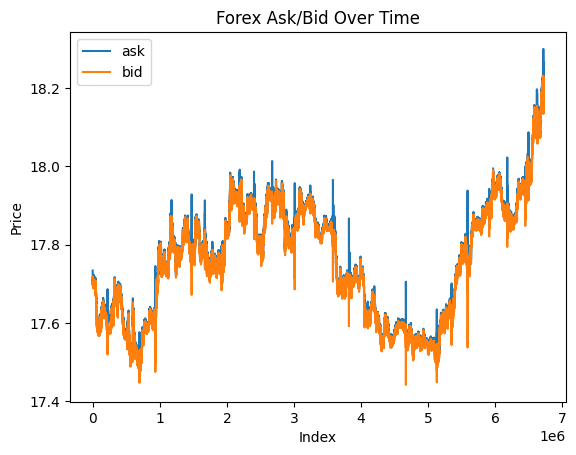

In [21]:

df[['ask', 'bid']].plot(title="Forex Ask/Bid Over Time")
plt.xlabel("Index")
plt.ylabel("Price")
plt.savefig("../data/processed/ask_bid_plot.png")
plt.show()
plt.close()


